## Makemore

- Bigrams method
- Video: https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=2
- makemore on github: https://github.com/karpathy/makemore
- jupyter notebook: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

In [1]:
# words = open('vietnamese_dataset/sample_vi_full_name.txt', 'r').read().splitlines()
words = open('vietnamese_dataset/sample_vi_name.txt', 'r').read().splitlines()
# words = open('vietnamese_dataset/names.txt', 'r').read().splitlines()
words[:10]

['Ngoc', 'Khuyen', 'Huệ', 'Kỷ', 'Sao', 'Uyen', 'Hoang', 'Xuan', 'Tuệ', 'Tieu']

In [2]:
import re

def clean_text(text):
    """
    Cleans text by removing special characters, extra whitespace, and converting to lowercase.

    Args:
        text: The input string.

    Returns:
        The cleaned string.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Remove other non-alphanumeric characters (if needed)
    # 2. Remove extra whitespace (multiple spaces, tabs, newlines)
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with single space and trim
    # 3. Convert to lowercase (optional, but often helpful for text analysis)
    text = text.lower()

    return text

In [3]:
clean_words = [clean_text(word) for word in words]
clean_words[:10]

['ngoc', 'khuyen', 'huệ', 'kỷ', 'sao', 'uyen', 'hoang', 'xuan', 'tuệ', 'tieu']

In [4]:
words = clean_words

In [5]:
min(len(w) for w in words), max(len(w) for w in words)

(1, 6)

### Bigram (one character predicts the next one with a lookup table of counts)

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key=lambda x: -x[1])[:10]

[(('<S>', 't'), 126),
 (('n', '<E>'), 117),
 (('n', 'g'), 112),
 (('g', '<E>'), 93),
 (('<S>', 'h'), 68),
 (('n', 'h'), 67),
 (('h', '<E>'), 54),
 (('t', 'h'), 54),
 (('<S>', 'n'), 46),
 (('a', 'n'), 44)]

In [8]:
# unique characters

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
len(stoi)

77

In [9]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'k': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'p': 14,
 'q': 15,
 'r': 16,
 's': 17,
 't': 18,
 'u': 19,
 'v': 20,
 'x': 21,
 'y': 22,
 'à': 23,
 'á': 24,
 'â': 25,
 'ã': 26,
 'ê': 27,
 'ì': 28,
 'í': 29,
 'ð': 30,
 'ò': 31,
 'ô': 32,
 'õ': 33,
 'ù': 34,
 'ú': 35,
 'ý': 36,
 'ă': 37,
 'đ': 38,
 'ĩ': 39,
 'ũ': 40,
 'ơ': 41,
 'ư': 42,
 'ạ': 43,
 'ả': 44,
 'ấ': 45,
 'ầ': 46,
 'ẩ': 47,
 'ẫ': 48,
 'ậ': 49,
 'ắ': 50,
 'ằ': 51,
 'ế': 52,
 'ề': 53,
 'ể': 54,
 'ễ': 55,
 'ệ': 56,
 'ị': 57,
 'ọ': 58,
 'ố': 59,
 'ồ': 60,
 'ổ': 61,
 'ộ': 62,
 'ớ': 63,
 'ờ': 64,
 'ở': 65,
 'ợ': 66,
 'ụ': 67,
 'ủ': 68,
 'ứ': 69,
 'ừ': 70,
 'ử': 71,
 'ữ': 72,
 'ự': 73,
 'ỳ': 74,
 'ỷ': 75,
 'ỹ': 76,
 '.': 0}

In [10]:
import torch

N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'x',
 22: 'y',
 23: 'à',
 24: 'á',
 25: 'â',
 26: 'ã',
 27: 'ê',
 28: 'ì',
 29: 'í',
 30: 'ð',
 31: 'ò',
 32: 'ô',
 33: 'õ',
 34: 'ù',
 35: 'ú',
 36: 'ý',
 37: 'ă',
 38: 'đ',
 39: 'ĩ',
 40: 'ũ',
 41: 'ơ',
 42: 'ư',
 43: 'ạ',
 44: 'ả',
 45: 'ấ',
 46: 'ầ',
 47: 'ẩ',
 48: 'ẫ',
 49: 'ậ',
 50: 'ắ',
 51: 'ằ',
 52: 'ế',
 53: 'ề',
 54: 'ể',
 55: 'ễ',
 56: 'ệ',
 57: 'ị',
 58: 'ọ',
 59: 'ố',
 60: 'ồ',
 61: 'ổ',
 62: 'ộ',
 63: 'ớ',
 64: 'ờ',
 65: 'ở',
 66: 'ợ',
 67: 'ụ',
 68: 'ủ',
 69: 'ứ',
 70: 'ừ',
 71: 'ử',
 72: 'ữ',
 73: 'ự',
 74: 'ỳ',
 75: 'ỷ',
 76: 'ỹ',
 0: '.'}

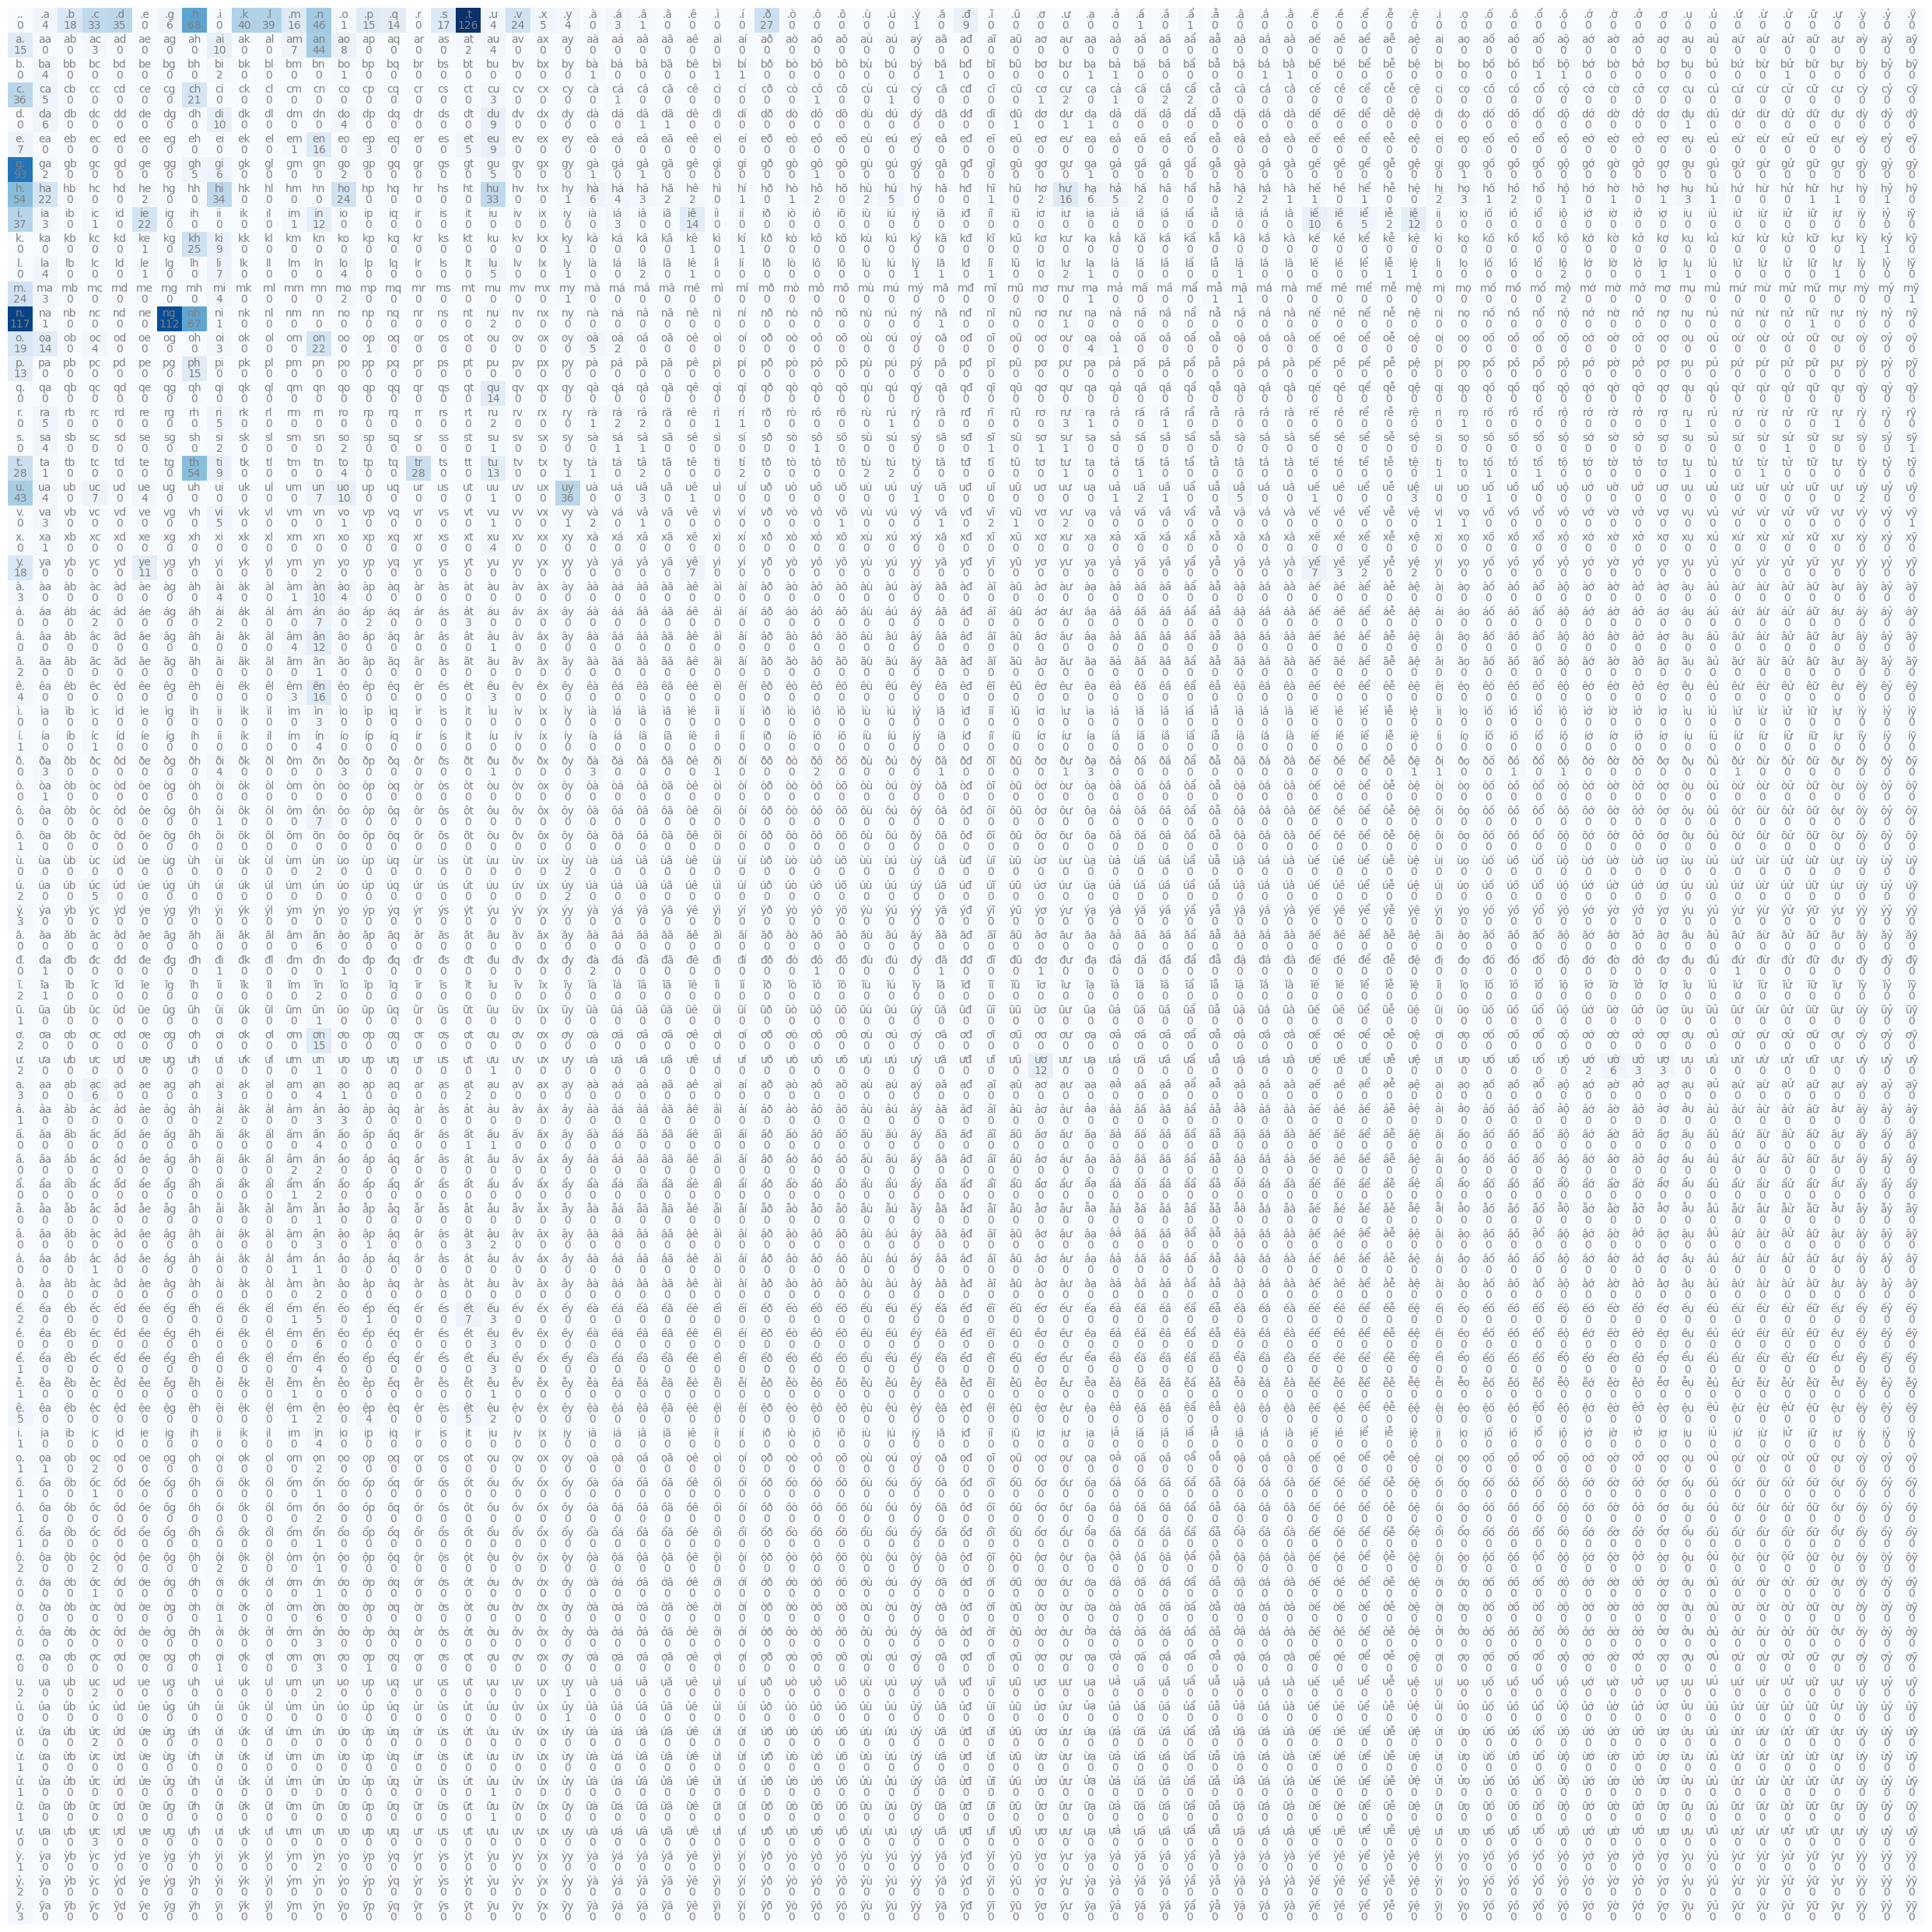

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [14]:
N[0, :]

tensor([  0,   4,  18,  33,  35,   0,   6,  68,   0,  40,  39,  16,  46,   1,
         15,  14,   0,  17, 126,   4,  24,   5,   4,   0,   3,   1,   0,   0,
          0,   0,  27,   0,   0,   0,   0,   0,   1,   0,   9,   0,   0,   0,
          0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0], dtype=torch.int32)

In [15]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0072, 0.0323, 0.0591, 0.0627, 0.0000, 0.0108, 0.1219, 0.0000,
        0.0717, 0.0699, 0.0287, 0.0824, 0.0018, 0.0269, 0.0251, 0.0000, 0.0305,
        0.2258, 0.0072, 0.0430, 0.0090, 0.0072, 0.0000, 0.0054, 0.0018, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0484, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0018, 0.0000, 0.0161, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0018, 0.0000, 0.0018, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

#### Note: `torch.multinomial`


**Giải thích**

Hàm `torch.multinomial(input, num_samples, replacement=False)` có các tham số sau:

*   **input**: Tensor chứa các xác suất (hoặc trọng số không âm). Các giá trị này sẽ được chuẩn hóa thành phân phối xác suất.
*   **num\_samples**: Số lượng mẫu cần lấy.
*   **replacement**: Nếu là `True`, có thể lấy một giá trị nhiều lần (lấy mẫu có hoàn lại). Nếu là `False` (mặc định), mỗi giá trị chỉ được lấy một lần.

Hàm trả về một tensor chứa các chỉ số của các mẫu được chọn.

**Ví dụ**

Giả sử bạn có một phân phối xác suất với 5 kết quả có thể, được biểu diễn bằng tensor `probabilities`:

```python
import torch

probabilities = torch.tensor([0.1, 0.2, 0.3, 0.2, 0.2])
```

Để lấy 2 mẫu từ phân phối này, bạn có thể sử dụng hàm `torch.multinomial`:

```python
samples = torch.multinomial(probabilities, num_samples=2)
print(samples)
```

Kết quả có thể là một tensor như `tensor([2, 0])`, nghĩa là mẫu đầu tiên được chọn là kết quả thứ 3 (chỉ số 2), và mẫu thứ hai được chọn là kết quả thứ nhất (chỉ số 0).

**Ứng dụng**

Hàm `torch.multinomial` thường được sử dụng trong các bài toán học sâu, đặc biệt là trong các mô hình sinh (generative models) như GANs hoặc VAEs, nơi cần lấy mẫu ngẫu nhiên từ một phân phối xác suất để tạo ra dữ liệu mới.

**Lưu ý**

*   Các giá trị trong `input` phải là không âm.
*   Nếu `replacement=False`, `num_samples` phải nhỏ hơn hoặc bằng số lượng phần tử trong `input`.

#### Note: `torch.Generator`

**Giải thích**

Trong PyTorch, `torch.Generator` là một object quản lý trạng thái của thuật toán tạo số ngẫu nhiên giả (pseudo-random number generator - PRNG). Nó cho phép bạn tạo ra các số ngẫu nhiên có thể tái lặp được bằng cách thiết lập một seed (hạt giống) cụ thể.

Khi bạn khởi tạo một `torch.Generator`, bạn có thể chỉ định một seed ban đầu. Sau đó, mỗi khi bạn sử dụng generator này để tạo số ngẫu nhiên, nó sẽ cập nhật trạng thái bên trong của mình. Nếu bạn sử dụng cùng một seed, bạn sẽ luôn nhận được cùng một chuỗi số ngẫu nhiên.

**Ví dụ**

```python
import torch

# Khởi tạo một generator với seed là 42
generator = torch.Generator().manual_seed(42)

# Tạo một tensor ngẫu nhiên với generator
random_tensor = torch.randn(2, 3, generator=generator)
print(random_tensor)

# Tạo một tensor ngẫu nhiên khác với cùng generator
another_random_tensor = torch.randn(2, 3, generator=generator)
print(another_random_tensor)
```

Trong ví dụ này, `random_tensor` và `another_random_tensor` sẽ chứa cùng các giá trị ngẫu nhiên vì chúng được tạo ra từ cùng một generator với cùng một seed.

**Ứng dụng**

*   **Kiểm soát tính ngẫu nhiên**: Khi bạn muốn đảm bảo rằng kết quả của bạn có thể tái lặp được, việc sử dụng `torch.Generator` với một seed cố định là rất quan trọng. Điều này đặc biệt hữu ích trong nghiên cứu khoa học, nơi bạn cần kiểm soát các yếu tố ngẫu nhiên trong thí nghiệm của mình.
*   **Khởi tạo tham số mạng nơ-ron**: Trong quá trình huấn luyện mạng nơ-ron, việc khởi tạo các tham số một cách ngẫu nhiên là rất quan trọng. `torch.Generator` cho phép bạn kiểm soát quá trình khởi tạo này, giúp đảm bảo tính ổn định và tái lặp của quá trình huấn luyện.

**Lưu ý**

*   Nếu bạn không chỉ định một seed, PyTorch sẽ sử dụng một seed ngẫu nhiên dựa trên thời gian hiện tại.
*   Bạn có thể lưu và tải trạng thái của một `torch.Generator` để tái sử dụng sau này.


In [16]:
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.4047, 0.4197, 0.1756])

In [17]:
torch.multinomial(p, 20, replacement=True, generator=g)

tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2])

In [18]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0072, 0.0323, 0.0591, 0.0627, 0.0000, 0.0108, 0.1219, 0.0000,
        0.0717, 0.0699, 0.0287, 0.0824, 0.0018, 0.0269, 0.0251, 0.0000, 0.0305,
        0.2258, 0.0072, 0.0430, 0.0090, 0.0072, 0.0000, 0.0054, 0.0018, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0484, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0018, 0.0000, 0.0161, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0018, 0.0000, 0.0018, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [19]:
g = torch.Generator().manual_seed(42)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'c'

In [20]:
P = (N+1).float()  # để cho không có xác suất = 0
P /= P.sum(dim=1, keepdim=True)

In [21]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

haứálýàýểuyềồkụsăg.
ng.
bđủớạxêĩụ.
tạeừọểắụồôìịengc.
ðuoìu.
lựởíâịầợấắữài.
n.
hiầậmĩộaiýỹp.
n.
ho.


#### How to evaluate the model

**NOTE**:

Trong thống kê, ước lượng hợp lý tối đa (Maximum Likelihood Estimation - MLE) là một phương pháp ước tính các tham số của một phân bố xác suất giả định, dựa trên một số dữ liệu quan sát được. Mục tiêu là tìm ra các tham số mà có khả năng tạo ra dữ liệu quan sát được cao nhất.

**Giải thích đơn giản:**

Hãy tưởng tượng bạn có một túi chứa đầy bi, có hai màu xanh và đỏ. Bạn không biết chính xác tỷ lệ bi xanh và bi đỏ trong túi là bao nhiêu. Bạn lấy ra một số lượng bi ngẫu nhiên (ví dụ: 10 viên) và ghi lại số lượng bi xanh và bi đỏ.

Bây giờ, bạn muốn sử dụng thông tin này để ước tính tỷ lệ bi xanh và bi đỏ trong túi. MLE là một phương pháp giúp bạn làm điều đó.

Về cơ bản, MLE hoạt động bằng cách thử các tỷ lệ khác nhau (ví dụ: 50% xanh - 50% đỏ, 60% xanh - 40% đỏ, v.v.) và tính toán xem với mỗi tỷ lệ, khả năng bạn lấy được chính xác số lượng bi xanh và bi đỏ mà bạn đã quan sát được là bao nhiêu. Tỷ lệ nào cho khả năng cao nhất thì đó chính là ước lượng MLE của bạn.

**Ví dụ minh họa:**

Giả sử bạn lấy ra 10 viên bi và quan sát được 7 viên xanh và 3 viên đỏ. Bạn muốn ước tính tỷ lệ bi xanh trong túi.

MLE sẽ thử các tỷ lệ khác nhau và tính toán khả năng thu được kết quả này. Ví dụ:

* Nếu tỷ lệ bi xanh là 50%, khả năng thu được 7 viên xanh và 3 viên đỏ là khá thấp.
* Nếu tỷ lệ bi xanh là 70%, khả năng thu được 7 viên xanh và 3 viên đỏ là cao hơn.
* Nếu tỷ lệ bi xanh là 80%, khả năng thu được 7 viên xanh và 3 viên đỏ lại thấp hơn.

MLE sẽ tìm ra tỷ lệ nào cho khả năng cao nhất, và đó chính là ước lượng của bạn. Trong trường hợp này, ước lượng MLE sẽ là 70%, vì tỷ lệ này cho khả năng cao nhất để bạn quan sát được 7 viên xanh và 3 viên đỏ trong 10 lần thử.

**Ứng dụng của MLE:**

MLE được sử dụng rộng rãi trong nhiều lĩnh vực, bao gồm:

* **Học máy**: Ước tính các tham số của mô hình học máy.
* **Thống kê**: Ước tính các tham số của phân bố xác suất.
* **Xử lý tín hiệu**: Ước tính các tham số của tín hiệu.
* **Kinh tế lượng**: Ước tính các tham số của mô hình kinh tế.

**Ưu điểm của MLE:**

* **Tính nhất quán**: Ước lượng MLE sẽ hội tụ đến giá trị thực của tham số khi kích thước mẫu tăng lên.
* **Hiệu quả**: Ước lượng MLE có phương sai nhỏ nhất trong số các ước lượng không thiên lệch.
* **Tính linh hoạt**: MLE có thể được áp dụng cho nhiều loại phân bố xác suất khác nhau.

**Nhược điểm của MLE:**

* **Tính toán phức tạp**: Đôi khi việc tìm kiếm giá trị tối đa của hàm правдоподобия có thể khó khăn.
* **Nhạy cảm với dữ liệu ngoại lệ**: MLE có thể bị ảnh hưởng bởi các giá trị ngoại lệ trong dữ liệu.


In [22]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [23]:
log_likelihood = 0.0
n = 0

# for w in words:
for w in ["thaiq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: {prob:.4f} logprob: {logprob:.4f}")
        
print(f"{log_likelihood=}")
nll = -log_likelihood # negative log likelihood
print(f"{nll=}")
print(f"{nll/n=}") # average negative log likelihood

.t: 0.2000 logprob: -1.6094
th: 0.2381 logprob: -1.4351
ha: 0.0693 logprob: -2.6696
ai: 0.0647 logprob: -2.7379
iq: 0.0049 logprob: -5.3230
q.: 0.0110 logprob: -4.5109
log_likelihood=tensor(-18.2859)
nll=tensor(18.2859)
nll/n=tensor(3.0477)


## The neural network approach

In [24]:
# Create the training set of bigrams
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

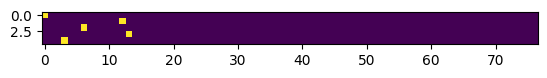

In [25]:
import torch.nn.functional as F 

xenc = F.one_hot(xs, num_classes=len(stoi)).float() # one-hot encoding of input
plt.imshow(xenc)

In [26]:
xenc.dtype

torch.float32

In [27]:
xenc.shape

torch.Size([5, 77])

In [28]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g)
W.shape

torch.Size([77, 77])

In [29]:
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [30]:
probs.shape

torch.Size([5, 77])

In [31]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .n (indexes 0,12)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0309, 0.0051, 0.0063, 0.0021, 0.0086, 0.0063, 0.0014, 0.0118, 0.0070,
        0.0159, 0.0040, 0.0142, 0.0046, 0.0042, 0.0254, 0.1211, 0.0307, 0.0013,
        0.0127, 0.0028, 0.0173, 0.0056, 0.0015, 0.0101, 0.0060, 0.0783, 0.0743,
        0.0033, 0.0019, 0.0087, 0.0022, 0.0133, 0.0068, 0.0239, 0.0029, 0.0028,
        0.0011, 0.0225, 0.0019, 0.0218, 0.0025, 0.0051, 0.0046, 0.0090, 0.0017,
        0.0198, 0.0117, 0.0102, 0.0068, 0.0011, 0.0072, 0.0144, 0.0111, 0.0020,
        0.0075, 0.0024, 0.0094, 0.0103, 0.0026, 0.0029, 0.0074, 0.0052, 0.0023,
        0.0014, 0.0165, 0.0027, 0.0369, 0.0545, 0.0027, 0.0111, 0.0119, 0.0293,
        0.0023, 0.0033, 0.0031, 0.0371, 0.0077])
label (actual next character): 12
probability assigned by the net to the the correct character: 0.0046408469788730145
log likelihood: -5.37285852432251
negative log likelihood: 5.37285852432251
---

In [32]:
# # --------- !!! OPTIMIZATION !!! yay --------------

In [33]:
xs

tensor([ 0, 12,  6, 13,  3])

In [34]:
ys

tensor([12,  6, 13,  3,  0])

In [35]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g, requires_grad=True)

In [36]:
# forward pass
xenc = F.one_hot(xs, num_classes=len(stoi)).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(xs)), ys].log().mean()

In [37]:
print(loss.item())

4.821526527404785


In [38]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [39]:
W.data += -0.1 * W.grad

In [40]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [41]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g, requires_grad=True)

number of examples:  2672


In [42]:
from tqdm import tqdm

# gradient descent
for k in tqdm(range(2_00_000)):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=len(stoi)).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  if k % 20_000 == 0:
    print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -0.01 * W.grad

  0%|          | 0/200000 [00:00<?, ?it/s]

4.734161376953125


 10%|█         | 20133/200000 [00:17<02:38, 1137.65it/s]

3.298201322555542


 20%|██        | 40222/200000 [00:35<02:15, 1180.24it/s]

2.930596351623535


 30%|███       | 60262/200000 [00:51<01:43, 1344.63it/s]

2.7423431873321533


 40%|████      | 80248/200000 [01:07<01:29, 1332.05it/s]

2.620901107788086


 50%|█████     | 100166/200000 [01:24<01:21, 1218.80it/s]

2.533828020095825


 60%|██████    | 120178/200000 [01:39<00:59, 1344.91it/s]

2.4675886631011963


 70%|███████   | 140175/200000 [01:55<00:45, 1301.87it/s]

2.4149534702301025


 80%|████████  | 160166/200000 [02:12<00:34, 1144.97it/s]

2.3716564178466797


 90%|█████████ | 180160/200000 [02:28<00:14, 1347.78it/s]

2.335141181945801


100%|██████████| 200000/200000 [02:43<00:00, 1223.48it/s]


In [44]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=len(stoi)).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

haứg.
thuyeng.
kụpăảỳm.
thang.
quo.
